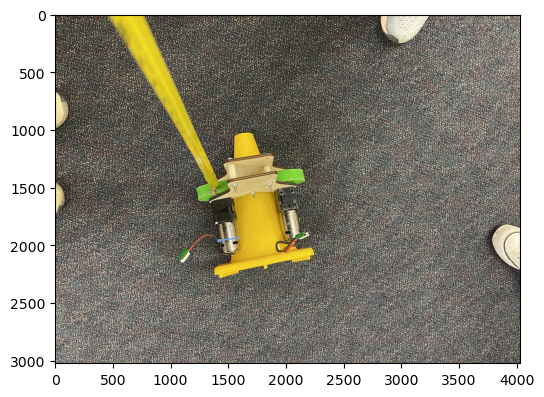

In [3]:
import cv2
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


def find_cubes(image,
               lower_hsv_threshold=np.array([170, 50, 70]),
               upper_hsv_threshold=np.array([190, 255, 255]),
               contour_color=(255, 0, 0)):
    _img_with_contours = image.copy()
    _blur_img = cv2.GaussianBlur(image, (99, 99), 0)
    _hsv_image = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
    _current_mask = cv2.inRange(_hsv_image, lower_hsv_threshold, upper_hsv_threshold)
    _contours, _hierarchy = cv2.findContours(_current_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for _c in _contours:
        _M = cv2.moments(_c)
        _area = cv2.contourArea(_c)
        try:
            _cX = int((_M["m10"] / _M["m00"]))
            _cY = int((_M["m01"] / _M["m00"]))
        except:
            _cX = 0
            _cY = 0

        if _area >= 30000:
            print("area:", _area)

            cv2.drawContours(_img_with_contours, [_c], -1, (0, 255, 0), 11)
            cv2.putText(_img_with_contours, "cube", (_cX, _cY), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 255, 255), 11)
    return _img_with_contours


def find_cones(image,
               lower_hsv_threshold=np.array([70, 150, 50]),
               upper_hsv_threshold=np.array([110, 255, 255]),
               contour_color=(255, 0, 0)):
    _img_with_contours = image.copy()
    _blur_img = cv2.GaussianBlur(image, (199, 199), 0)
    _hsv_image = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
    _current_mask = cv2.inRange(_hsv_image, lower_hsv_threshold, upper_hsv_threshold)
    _contours, _hierarchy = cv2.findContours(_current_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for _c in _contours:
        _M = cv2.moments(_c)
        _area = cv2.contourArea(_c)
        try:
            _cX = int((_M["m10"] / _M["m00"]))
            _cY = int((_M["m01"] / _M["m00"]))
        except:
            _cX = 0
            _cY = 0

        if _area >= 30000:
            print("area:", _area)

            cv2.drawContours(_img_with_contours, [_c], -1, (0, 255, 0), 11)
            cv2.putText(_img_with_contours, "cone", (_cX, _cY), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 255, 255), 11)
    return _img_with_contours


img = mpimg.imread('cone1.jpg')
new_img = find_cubes(img)
plt.figure(figsize=(6, 6))
plt.imshow(new_img, cmap='gray')
plt.show()

area: 8897.0
497
562
area: 12075.5
329
467


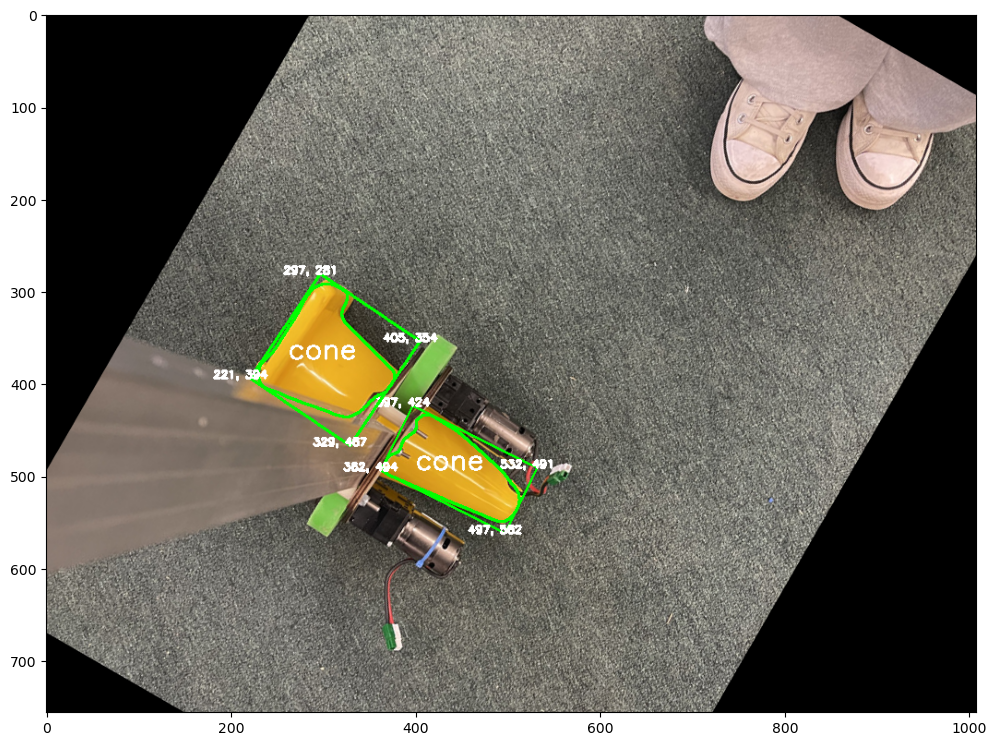

In [158]:
import cv2
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def detect_cone(image, lower_hsv_threshold=np.array([90, 150, 150]), upper_hsv_threshold=np.array([110, 255, 255]), contour_color=(0, 255, 0), rect_color=(255, 0, 0)):
    _img_with_contours = image.copy()
    
    _blur_img = cv2.GaussianBlur(image, (49, 49), 0)
    _hsv_image = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
    _current_mask = cv2.inRange(_hsv_image, lower_hsv_threshold, upper_hsv_threshold)
    _contours, _hierarchy = cv2.findContours(_current_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    _contours_poly = [None]*len(_contours)
    _boundRect = [None]*len(_contours)
    for _i, _c in enumerate(_contours):
        _M = cv2.moments(_c)
        _area = cv2.contourArea(_c)
        try:
            _cX = int((_M["m10"] / _M["m00"]))
            _cY = int((_M["m01"] / _M["m00"]))
        except:
            _cX = 0
            _cY = 0

        if _area >= 1000:
            print("area:", _area)
            
            
            
            # cv2.putText(_img_with_contours, (str(_contours_poly[_i][0]) + ", " + str(_contours_poly[_i][1])), (int(_contours_poly[_i][0]), int(_contours_poly[_i][1])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            # cv2.putText(_img_with_contours, (str(_contours_poly[_i][2]) + ", " + str(_contours_poly[_i][3])), (int(_contours_poly[_i][2]), int(_contours_poly[_i][3])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            # cv2.putText(_img_with_contours, (str(_contours_poly[_i][4]) + ", " + str(_contours_poly[_i][5])), (int(_contours_poly[_i][4]), int(_contours_poly[_i][5])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            # cv2.putText(_img_with_contours, (str(_contours_poly[_i][6]) + ", " + str(_contours_poly[_i][7])), (int(_contours_poly[_i][6]), int(_contours_poly[_i][7])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            
            rect = cv2.minAreaRect(_c)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(_img_with_contours, [_c], -1, contour_color, 2)
            cv2.putText(_img_with_contours, "cone", (_cX - 40, _cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.drawContours(_img_with_contours, [box], -1, contour_color, 2)
            print(str(box[0][0]))
            print(str(box[0][1]))
            cv2.putText(_img_with_contours, (str(box[0][0]) + ", " + str(box[0][1])), (box[0][0] - 40, box[0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2)
            cv2.putText(_img_with_contours, (str(box[1][0]) + ", " + str(box[1][1])), (box[1][0] - 40, box[1][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2)
            cv2.putText(_img_with_contours, (str(box[2][0]) + ", " + str(box[2][1])), (box[2][0] - 40, box[2][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2)
            cv2.putText(_img_with_contours, (str(box[3][0]) + ", " + str(box[3][1])), (box[3][0] - 40, box[3][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2)

    return _img_with_contours


img = mpimg.imread('cone6_small.jpg')

(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), 60, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

new_img = detect_cone(rotated)
plt.figure(figsize=(12, 12))
plt.imshow(new_img)
plt.show()